# KMeans, GMM, DBScan and Hierarchical Clustering

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import random

import umap

from sklearn import datasets, cluster, preprocessing, mixture

In [2]:
def get_color(i, n_clusters):
    if i == -1:
        return 'gray'
    return plt.cm.jet(float(i) / n_clusters)

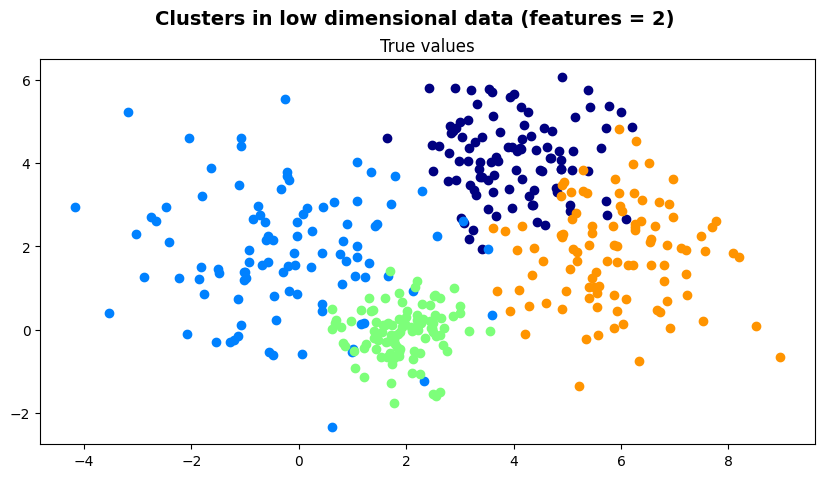

In [3]:
from numpy import append


n_clusters=4

# Centros definidos para cada cluster:
#centers=[[3,4],[-2,6],[3,12]]
#centers=[[random.randrange(0, 11, 2),random.randrange(0, 11, 2)],[random.randrange(0, 11, 2),random.randrange(0, 11, 2)],[random.randrange(0, 11, 2),random.randrange(0, 11, 2)],[random.randrange(0, 11, 2),random.randrange(0, 11, 2)]]

# Densidades dos pontos ao redor de cada centro:
#cluster_std = [1.2, 0.8, 2]
#cluster_std = [random.uniform(0.5, 2),random.uniform(0.5, 2),random.uniform(0.5, 2), random.uniform(0.5, 2)]

centers = []
cluster_std = []
for i in range(n_clusters):
    centers.append([random.randrange(0, 11, 2),random.randrange(0, 11, 2)])
    cluster_std.append(random.uniform(0.5, 2))

X, y = datasets.make_blobs(n_samples=400, centers=centers, cluster_std=cluster_std,
                            random_state=0)

fig, ax1 = plt.subplots(1, 1, sharey=True, figsize=(10, 5))

fig.suptitle('Clusters in low dimensional data (features = {})'.format(np.shape(X)[1]), fontsize=14, fontweight='bold')

df = pd.DataFrame(X, columns=['X1', 'X2'])
df['true_cluster'] = y

true_clusters = list(range(0, n_clusters))
ax1.set_title('True values')
for i in true_clusters:
    ax1.scatter(df[df.true_cluster == i].X1, df[df.true_cluster == i].X2, label=i, color=get_color(i, len(true_clusters)))

fig.savefig("Exemplo01 - Parte 01.png")

In [4]:
kmeans = cluster.KMeans(n_clusters=n_clusters)
label = kmeans.fit_predict(X)
predicted_clusters_kmeans = np.unique(label)
df['predicted_cluster_kmeans'] = label

gmm = mixture.GaussianMixture(n_components=n_clusters)
label = gmm.fit_predict(X)
predicted_clusters_gmm = np.unique(label)
df['predicted_cluster_gmm'] = label

dbscan = cluster.DBSCAN(eps=0.5, min_samples=5)
label = dbscan.fit_predict(X)
predicted_clusters_dbscan = np.unique(label)
df['predicted_cluster_dbscan'] = label

hclust = cluster.AgglomerativeClustering(n_clusters=n_clusters)
label = hclust.fit_predict(X)
predicted_clusters_hierarquical = np.unique(label)
df['predicted_cluster_hierarquical'] = label



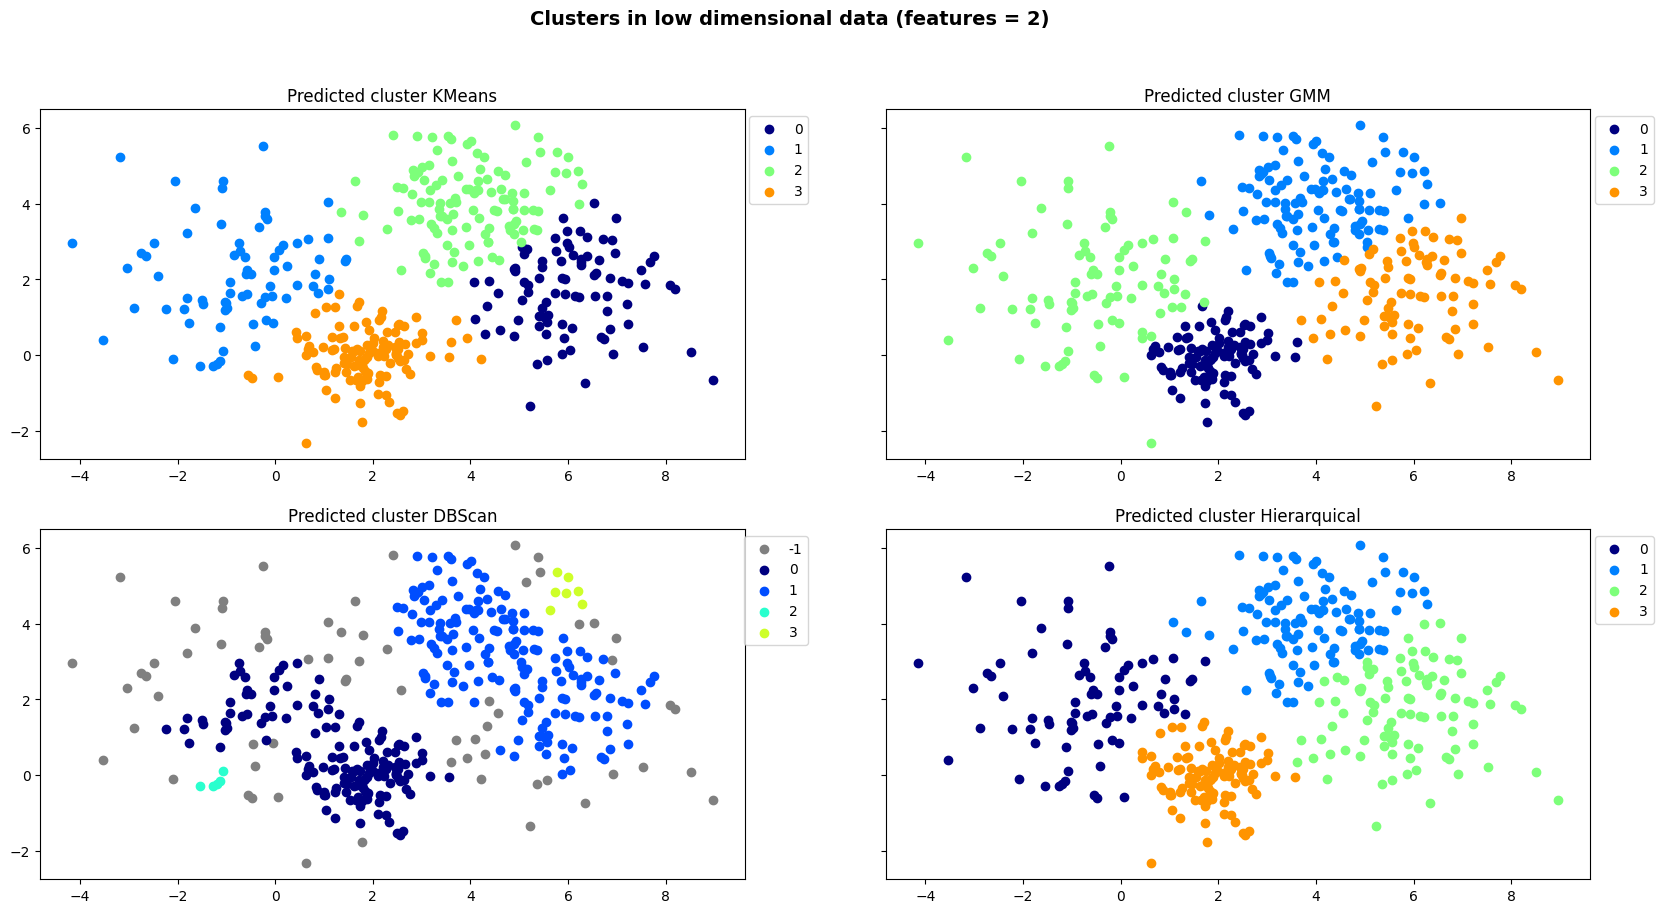

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, figsize=(20, 10))

fig.suptitle('Clusters in low dimensional data (features = {})'.format(np.shape(X)[1]), fontsize=14, fontweight='bold')

    
ax1.set_title('Predicted cluster KMeans')
for i in predicted_clusters_kmeans:
    ax1.scatter(df[df.predicted_cluster_kmeans == i].X1, df[df.predicted_cluster_kmeans == i].X2, label=i, color=get_color(i, len(predicted_clusters_kmeans)))

ax2.set_title('Predicted cluster GMM')
for i in predicted_clusters_gmm:
    ax2.scatter(df[df.predicted_cluster_gmm == i].X1, df[df.predicted_cluster_gmm == i].X2, label=i, color=get_color(i, len(predicted_clusters_gmm)))

ax3.set_title('Predicted cluster DBScan')
for i in predicted_clusters_dbscan:
    ax3.scatter(df[df.predicted_cluster_dbscan == i].X1, df[df.predicted_cluster_dbscan == i].X2, label=i, color=get_color(i, len(predicted_clusters_dbscan)))

ax4.set_title('Predicted cluster Hierarquical')
for i in predicted_clusters_hierarquical:
    ax4.scatter(df[df.predicted_cluster_hierarquical == i].X1, df[df.predicted_cluster_hierarquical == i].X2, label=i, color=get_color(i, len(predicted_clusters_hierarquical)))

ax1.legend(bbox_to_anchor=(1.1, 1))
ax2.legend(bbox_to_anchor=(1.1, 1))
ax3.legend(bbox_to_anchor=(1.1, 1))
ax4.legend(bbox_to_anchor=(1.1, 1))

plt.savefig("Exemplo01 - Parte 02.png")
plt.show()